In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install chemprop
!pip install rdkit-pypi  # should be included in above after Chemprop v1.6 release

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [3]:
import chemprop
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA

In [ ]:
arguments = [
    '--data_path', '/content/drive/MyDrive/BBB dataset/df.csv',
    '--dataset_type', 'regression',
    '--save_dir', '/content/drive/MyDrive/BBB dataset/test_checkpoints_reg',
    '--epochs', '30',  # Further increase epochs
    '--batch_size', '64',  # Experiment with larger batch sizes
    '--hidden_size', '256',  # Further increase hidden size
    '--depth', '5',  # Increase depth
    '--dropout', '0.3',  # Experiment with higher dropout rate
    '--init_lr', '0.0001',  # Try a smaller initial learning rate
    '--max_lr', '0.01',  # Add a max learning rate for scheduling
    '--log_frequency', '5',
    '--num_folds', '2'  # Increase cross-validation folds
]
args = chemprop.args.TrainArgs().parse_args(arguments)

# Run cross-validation
mean_score,std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

print(f"Mean score: {mean_score}")
print(f"Standard deviation of score: {std_score}")

Command line
python /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-f5079352-4646-4998-be0a-58b60af46dc8.json
Args
{'activation': 'ReLU',
 'adding_bond_types': True,
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_constraints': [],
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'atom_targets': [],
 'batch_size': 64,
 'bias': False,
 'bias_solvent': False,
 'bond_constraints': [],
 'bond_descriptor_scaling': True,
 'bond_descriptors': None,
 'bond_descriptors_path': None,
 'bond_descriptors_size': 0,
 'bond_features_size': 0,
 'bond_targets': [],
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'constraints_path': None,
 'crossval_index_dir': None,

Mean score: 0.5669148703827102
Standard deviation of score: 0.03445687843544465


In [ ]:
arguments = [
    '--test_path', '/content/drive/MyDrive/BBB dataset/test_checkpoints_reg/fold_0/test_smiles.csv',
    '--preds_path', '/content/drive/MyDrive/BBB dataset/test_checkpoints_reg/test_preds_reg.csv',
    '--checkpoint_dir','/content/drive/MyDrive/BBB dataset/test_checkpoints_reg'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)
one = pd.read_csv('/content/drive/MyDrive/BBB dataset/test_checkpoints_reg/fold_0/test_full.csv')
one['preds'] = [x[0] for x in preds]
one

Loading training args
Setting molecule featurization parameters to default.
Loading data


105it [00:00, 62842.74it/s]
100%|██████████| 105/105 [00:00<00:00, 46662.63it/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Validating SMILES
Test size = 105


  0%|          | 0/5 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".



 20%|██        | 1/5 [00:02<00:08,  2.02s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".



 40%|████      | 2/5 [00:03<00:04,  1.53s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".



 60%|██████    | 3/5 [00:05<00:03,  1.94s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".



 80%|████████  | 4/5 [00:08<00:02,  2.21s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".



100%|██████████| 5/5 [00:11<00:00,  2.24s/it]


Saving predictions to /content/drive/MyDrive/BBB dataset/test_checkpoints_reg/test_preds_reg.csv
Elapsed time = 0:00:12


,smiles,logBB,preds
0,[N-]=[N+]=O,0.03,-0.519348
1,C1=CC(=CC(=C1)C(F)(F)F)/C(=N/OCCCCC(=O)O)/C2=C...,-1.00,-0.233373
2,CC(C)CN(CC(C(CC1=CC=CC=C1)NC(=O)OC2CCOC2)O)S(=...,-0.56,-0.454997
3,C1[C@@H]([C@H]1N)C2=CC=C(C=C2)F,0.81,0.609546
4,CCCCCC1(C(=O)NC(=O)NC1=O)CC,0.09,-0.318821
...,...,...,...
100,C(C(F)(F)F)(Cl)Br,0.30,0.388112
101,C1C2=CN=C(N2C3=C(C=C(C=C3)Cl)C(=N1)C4=CC=CC=C4...,-0.10,-0.019962
102,c1(C(C)C)onc(c4ncn2c4CNC(c3c2cccc3Cl)=O)n1,-0.30,-0.445035
103,CN1CC2C(C1)C3=C(C=CC(=C3)Cl)OC4=CC=CC=C24,1.03,0.605131


In [ ]:
arguments = [
    '--test_path', '/content/drive/MyDrive/BBB dataset/test_checkpoints_reg/fold_0/val_smiles.csv',
    '--preds_path', '/content/drive/MyDrive/BBB dataset/test_checkpoints_reg/val_preds_reg.csv',
    '--checkpoint_dir','/content/drive/MyDrive/BBB dataset/test_checkpoints_reg'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

two = pd.read_csv('/content/drive/MyDrive/BBB dataset/test_checkpoints_reg/fold_0/val_full.csv')
two['preds'] = [x[0] for x in preds]
two

Loading training args
Setting molecule featurization parameters to default.
Loading data


105it [00:00, 72279.98it/s]
100%|██████████| 105/105 [00:00<00:00, 55732.97it/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Validating SMILES
Test size = 105


  0%|          | 0/5 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".



 20%|██        | 1/5 [00:02<00:08,  2.22s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".



 40%|████      | 2/5 [00:03<00:05,  1.75s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".



 60%|██████    | 3/5 [00:05<00:03,  1.67s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".



 80%|████████  | 4/5 [00:06<00:01,  1.42s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".



100%|██████████| 5/5 [00:07<00:00,  1.46s/it]


Saving predictions to /content/drive/MyDrive/BBB dataset/test_checkpoints_reg/val_preds_reg.csv
Elapsed time = 0:00:08


,smiles,logBB,preds
0,C1CCN(CC1)C2=NC(=NC3=C2N=C(N=C3N4CCCCC4)N(CCO)...,0.00,-0.427214
1,CN1CCC[C@H](C1)C2=NC3=CC=CC=C3N2CC4=CC=C(C=C4)F,0.43,0.408910
2,CC[C@]1(C[C@@H](C2=C([C@H]1O)C(=C3C(=C2O)C(=O)...,0.56,-0.499558
3,CC1=CC=CC=C1C2=C(C=NC=C2)C(=O)N(C)CC3=CC(=CC(=...,0.68,0.281457
4,CN=C(C[N+](=O)[O-])NCCCSC1=CC=C(O1)CN(C)C,-1.23,-0.414510
...,...,...,...
100,CC(CC1=CC=CC=C1)N,0.93,0.671910
101,CN(C1CCN(CC1)CC(COC2=CC(=C(C=C2)F)F)O)C3=NC4=C...,0.59,0.080395
102,CCC1(CC(C2=C(C1O)C(=C3C(=C2O)C(=O)C4=C(C3=O)C=...,0.56,-0.457885
103,CN(C)C1=[NH+]C=CC(=C1)C2=N[NH]C(=N2)N,-1.17,-0.465224


In [ ]:
arguments = [
    '--test_path', '/content/drive/MyDrive/BBB dataset/test_checkpoints_reg/fold_0/train_smiles.csv',
    '--preds_path', '/content/drive/MyDrive/BBB dataset/test_checkpoints_reg/train_preds_reg.csv',
    '--checkpoint_dir','/content/drive/MyDrive/BBB dataset/test_checkpoints_reg'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

three = pd.read_csv('/content/drive/MyDrive/BBB dataset/test_checkpoints_reg/fold_0/train_full.csv')
three['preds'] = [x[0] for x in preds]
three

Loading training args
Setting molecule featurization parameters to default.
Loading data


837it [00:00, 72149.13it/s]
100%|██████████| 837/837 [00:00<00:00, 58203.03it/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Validating SMILES
Test size = 837


  0%|          | 0/5 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".



 20%|██        | 1/5 [00:05<00:22,  5.55s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".



 40%|████      | 2/5 [00:09<00:14,  4.71s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".



 60%|██████    | 3/5 [00:14<00:09,  4.57s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".



 80%|████████  | 4/5 [00:19<00:05,  5.03s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".



100%|██████████| 5/5 [00:24<00:00,  4.83s/it]


Saving predictions to /content/drive/MyDrive/BBB dataset/test_checkpoints_reg/train_preds_reg.csv
Elapsed time = 0:00:26


,smiles,logBB,preds
0,CC(C)(C)C1=CC2=NN=C(N2N=C1OCC3=NC=NN3C)C4=C(C=...,-0.20,-0.340454
1,CN(C)CC1=CC=C(O1)CSCCNC2=C(C(=CN2)CC3=CC=CC=C3...,-0.73,-0.367427
2,C=CCC1=C(C(=CC=C1)/C=N\NC(=O)CN2CCN(CC2)CC3=CC...,-1.67,-0.387648
3,C[NH2+]CCCN1C2=CC=CC=C2CCC3=CC=CC=C31,1.20,0.693838
4,CC(C)(C)C1=CC(=CC(=C1O)C(C)(C)C)CN2CCN(CC2)CC(...,0.91,0.376521
...,...,...,...
832,C1CCN(C1)CCN2C=CC3=C2C=C(C=C3)NC(=O)CC4=CC=C(C...,-0.59,0.167099
833,CC1=C2C(=CC=C1)[C@@H]3CN(CC[C@@]3(C4=CC=CC=C4O...,0.82,0.288152
834,CCC(C)N(C)C(=O)C1=CC2=CC=CC=C2C(=N1)C3=CC=CC=C3Cl,0.48,0.022027
835,CCC(=O)NC1CCC(CC1)CCN2CCN(CC2)C3=C(C(=CC=C3)Cl)Cl,0.90,0.400917


Train - MSE: 0.30, RMSE: 0.55, Pearson R² score: 0.42
Test - MSE: 0.30, RMSE: 0.55, Pearson R² score: 0.41
VAl - MSE: 0.30, RMSE: 0.55, Pearson R² score: 0.42


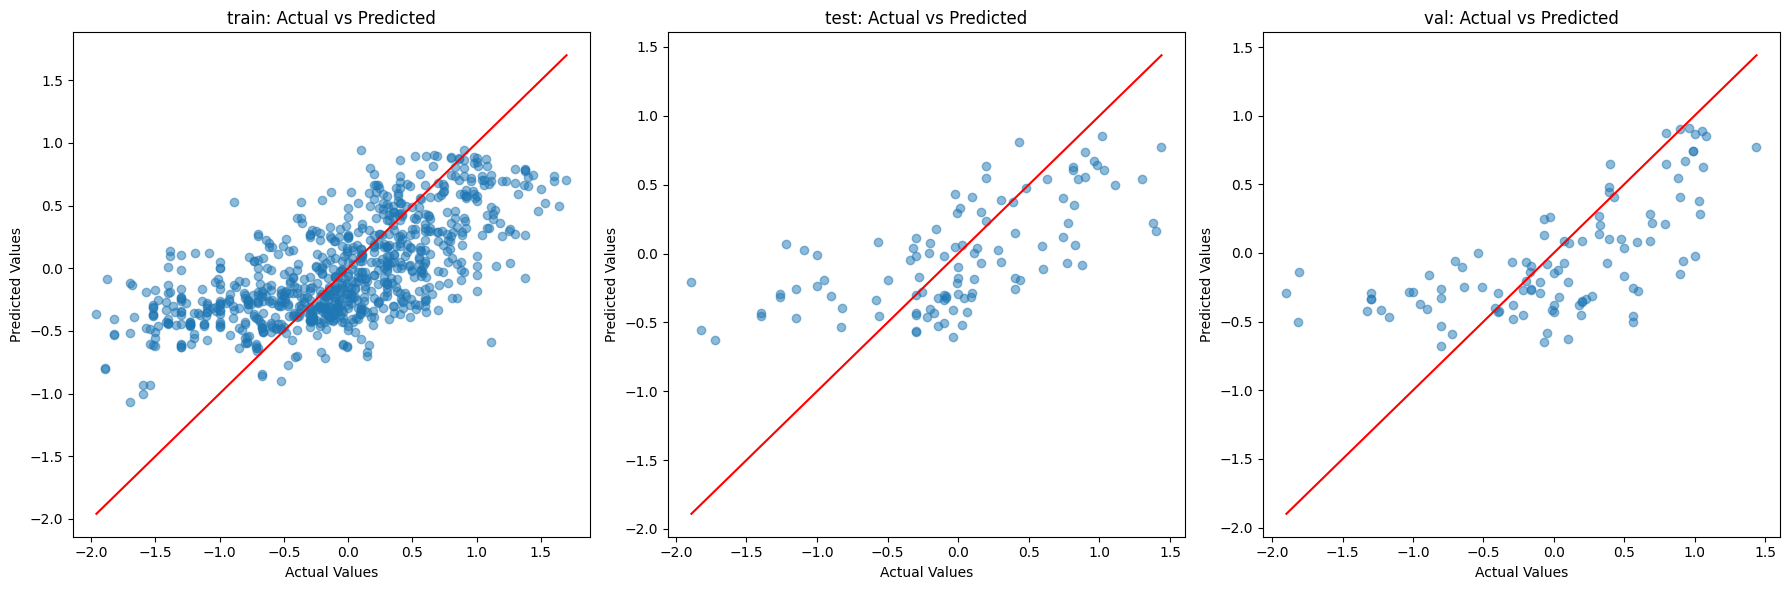

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def plot_parity(ax, y_true, y_pred, title):
    ax.scatter(y_true, y_pred, alpha=0.5)
    ax.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(title)

def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2


df1 = one
df2 = two
df3 = three

mse1, rmse1, r2_1 = calculate_metrics(df1['logBB'], df1['preds'])
mse2, rmse2, r2_2 = calculate_metrics(df2['logBB'], df2['preds'])
mse3, rmse3, r2_3 = calculate_metrics(df3['logBB'], df3['preds'])

print(f"Train - MSE: {mse3:.2f}, RMSE: {rmse3:.2f}, Pearson R² score: {r2_3:.2f}")
print(f"Test - MSE: {mse1:.2f}, RMSE: {rmse1:.2f}, Pearson R² score: {r2_1:.2f}")
print(f"VAl - MSE: {mse2:.2f}, RMSE: {rmse2:.2f}, Pearson R² score: {r2_2:.2f}")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))


plot_parity(axes[0], df3['logBB'], df3['preds'], 'train: Actual vs Predicted')
plot_parity(axes[1], df1['logBB'], df1['preds'], 'test: Actual vs Predicted')
plot_parity(axes[2], df2['logBB'], df2['preds'], 'val: Actual vs Predicted')


plt.tight_layout()
plt.show()


In [ ]:
# Installing Deepchem
!pip install --pre deepchem
import deepchem
deepchem.__version__

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.8 MB/s eta 0:00:00


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


'2.8.1.dev'

In [ ]:
!pip install rdkit-pypi
!pip install pandas
!pip install Pillow
!pip install matplotlib
!pip install pydot
!sudo apt-get -qq install graphviz

In [ ]:
import deepchem as dc
# Installing conda
!curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import conda_installer
conda_installer.install()
!/root/miniconda/bin/conda info -e
!pip install scikit-learn


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3457  100  3457    0     0  13664      0 --:--:-- --:--:-- --:--:-- 13718


add /root/miniconda/lib/python3.10/site-packages to PYTHONPATH
INFO:conda_installer:add /root/miniconda/lib/python3.10/site-packages to PYTHONPATH
python version: 3.10.12
INFO:conda_installer:python version: 3.10.12
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
INFO:conda_installer:fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
INFO:conda_installer:done
installing miniconda to /root/miniconda
INFO:conda_installer:installing miniconda to /root/miniconda
done
INFO:conda_installer:done
installing openmm, pdbfixer
INFO:conda_installer:installing openmm, pdbfixer
added conda-forge to channels
INFO:conda_installer:added conda-forge to channels
done
INFO:conda_installer:done
conda packages installation finished!
INFO:conda_installer:conda packages installation finished!


# conda environments:
#
base                     /root/miniconda



In [ ]:
import pandas as pd
import deepchem as dc
from deepchem.models import GraphConvModel
from sklearn.model_selection import ParameterGrid

In [ ]:
file_path = '/content/drive/MyDrive/BBB dataset/test_checkpoints_reg/fold_0/train_full.csv'
train = pd.read_csv(file_path)
train

,smiles,logBB
0,CC(C)(C)C1=CC2=NN=C(N2N=C1OCC3=NC=NN3C)C4=C(C=...,-0.20
1,CN(C)CC1=CC=C(O1)CSCCNC2=C(C(=CN2)CC3=CC=CC=C3...,-0.73
2,C=CCC1=C(C(=CC=C1)/C=N\NC(=O)CN2CCN(CC2)CC3=CC...,-1.67
3,C[NH2+]CCCN1C2=CC=CC=C2CCC3=CC=CC=C31,1.20
4,CC(C)(C)C1=CC(=CC(=C1O)C(C)(C)C)CN2CCN(CC2)CC(...,0.91
...,...,...
832,C1CCN(C1)CCN2C=CC3=C2C=C(C=C3)NC(=O)CC4=CC=C(C...,-0.59
833,CC1=C2C(=CC=C1)[C@@H]3CN(CC[C@@]3(C4=CC=CC=C4O...,0.82
834,CCC(C)N(C)C(=O)C1=CC2=CC=CC=C2C(=N1)C3=CC=CC=C3Cl,0.48
835,CCC(=O)NC1CCC(CC1)CCN2CCN(CC2)C3=C(C(=CC=C3)Cl)Cl,0.90


In [ ]:
file_path = '/content/drive/MyDrive/BBB dataset/test_checkpoints_reg/fold_0/test_full.csv'
test = pd.read_csv(file_path)
test

,smiles,logBB
0,[N-]=[N+]=O,0.03
1,C1=CC(=CC(=C1)C(F)(F)F)/C(=N/OCCCCC(=O)O)/C2=C...,-1.00
2,CC(C)CN(CC(C(CC1=CC=CC=C1)NC(=O)OC2CCOC2)O)S(=...,-0.56
3,C1[C@@H]([C@H]1N)C2=CC=C(C=C2)F,0.81
4,CCCCCC1(C(=O)NC(=O)NC1=O)CC,0.09
...,...,...
100,C(C(F)(F)F)(Cl)Br,0.30
101,C1C2=CN=C(N2C3=C(C=C(C=C3)Cl)C(=N1)C4=CC=CC=C4...,-0.10
102,c1(C(C)C)onc(c4ncn2c4CNC(c3c2cccc3Cl)=O)n1,-0.30
103,CN1CC2C(C1)C3=C(C=CC(=C3)Cl)OC4=CC=CC=C24,1.03


In [ ]:
file_path = '/content/drive/MyDrive/BBB dataset/test_checkpoints_reg/fold_0/val_full.csv'
val = pd.read_csv(file_path)
val

,smiles,logBB
0,C1CCN(CC1)C2=NC(=NC3=C2N=C(N=C3N4CCCCC4)N(CCO)...,0.00
1,CN1CCC[C@H](C1)C2=NC3=CC=CC=C3N2CC4=CC=C(C=C4)F,0.43
2,CC[C@]1(C[C@@H](C2=C([C@H]1O)C(=C3C(=C2O)C(=O)...,0.56
3,CC1=CC=CC=C1C2=C(C=NC=C2)C(=O)N(C)CC3=CC(=CC(=...,0.68
4,CN=C(C[N+](=O)[O-])NCCCSC1=CC=C(O1)CN(C)C,-1.23
...,...,...
100,CC(CC1=CC=CC=C1)N,0.93
101,CN(C1CCN(CC1)CC(COC2=CC(=C(C=C2)F)F)O)C3=NC4=C...,0.59
102,CCC1(CC(C2=C(C1O)C(=C3C(=C2O)C(=O)C4=C(C3=O)C=...,0.56
103,CN(C)C1=[NH+]C=CC(=C1)C2=N[NH]C(=N2)N,-1.17


In [ ]:
from scipy import stats
from deepchem.metrics import pearson_r2_score

featurizer = dc.feat.ConvMolFeaturizer()

train_features = featurizer.featurize(train['smiles'].tolist())
val_features = featurizer.featurize(val['smiles'].tolist())
test_features = featurizer.featurize(test['smiles'].tolist())

# Create datasets
train_dataset = dc.data.NumpyDataset(X=train_features, y=train['logBB'].values)
val_dataset = dc.data.NumpyDataset(X=val_features, y=val['logBB'].values)
test_dataset = dc.data.NumpyDataset(X=test_features, y=test['logBB'].values)

# Normalize the datasets
transformer = dc.trans.NormalizationTransformer(transform_y=True, dataset=train_dataset)
train_dataset = transformer.transform(train_dataset)
val_dataset = transformer.transform(val_dataset)
test_dataset = transformer.transform(test_dataset)

# Define GCN model
gcn_model = GraphConvModel(n_tasks=1, mode='regression', batch_size=32, learning_rate=0.001)

# Train GCN model
gcn_model.fit(train_dataset, nb_epoch=30)

# Evaluate GCN model
gcn_train_scores = gcn_model.evaluate(train_dataset, metrics=[dc.metrics.Metric(pearson_r2_score)])
gcn_val_scores = gcn_model.evaluate(val_dataset, metrics=[dc.metrics.Metric(pearson_r2_score)])
gcn_test_scores = gcn_model.evaluate(test_dataset, metrics=[dc.metrics.Metric(pearson_r2_score)])

print("GCN Train Scores:", gcn_train_scores)
print("GCN Validation Scores:", gcn_val_scores)
print("GCN Test Scores:", gcn_test_scores)



ValueError: Unrecognized keyword arguments passed to BatchNormalization: {'fused': False}

In [ ]:
from deepchem.models import GraphConvModel

def print_graphconv_model_architecture(model):
    """Print the architecture of the GraphConvModel."""

    # Print the type of model
    print(f"Model Type: {type(model)}")

    # Access and print the model's internal components
    if hasattr(model, 'model'):
        print("Model's internal Keras model:")
        print(model.model.summary())
    else:
        print("Model's internal Keras model is not available")



# Print the architecture
print_graphconv_model_architecture(gcn_model)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Get predictions
train_preds = gcn_model.predict(train_dataset)
val_preds = gcn_model.predict(val_dataset)
test_preds = gcn_model.predict(test_dataset)

# Reverse the transformation for predictions and actual values
transformer = dc.trans.NormalizationTransformer(transform_y=True, dataset=train_dataset)
train_preds = transformer.untransform(train_preds)
val_preds = transformer.untransform(val_preds)
test_preds = transformer.untransform(test_preds)
train_y = transformer.untransform(train_dataset.y)
val_y = transformer.untransform(val_dataset.y)
test_y = transformer.untransform(test_dataset.y)

# Calculate MSE and RMSE
def calculate_metrics(true_values, predictions):
    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)
    return mse, rmse

train_mse, train_rmse = calculate_metrics(train_y, train_preds)
val_mse, val_rmse = calculate_metrics(val_y, val_preds)
test_mse, test_rmse = calculate_metrics(test_y, test_preds)

print(f"Training Set - MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}")
print(f"Validation Set - MSE: {val_mse:.4f}, RMSE: {val_rmse:.4f}")
print(f"Test Set - MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}")

In [ ]:
import matplotlib.pyplot as plt

# Get predictions
train_preds = gcn_model.predict(train_dataset)
val_preds = gcn_model.predict(val_dataset)
test_preds = gcn_model.predict(test_dataset)

# Reverse the transformation for predictions and actual values
# Note: Ensure you have used the correct normalization transformer or similar for untransform
transformer = dc.trans.NormalizationTransformer(transform_y=True, dataset=train_dataset)
train_preds = transformer.untransform(train_preds)
val_preds = transformer.untransform(val_preds)
test_preds = transformer.untransform(test_preds)
train_y = transformer.untransform(train_dataset.y)
val_y = transformer.untransform(val_dataset.y)
test_y = transformer.untransform(test_dataset.y)

# Plotting training predictions vs actual values
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(train_y, train_preds, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training Set: Actual vs Predicted Values')
plt.plot([min(train_y), max(train_y)], [min(train_y), max(train_y)], color='red')

# Plotting validation predictions vs actual values
plt.subplot(1, 3, 2)
plt.scatter(val_y, val_preds, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Validation Set: Actual vs Predicted Values')
plt.plot([min(val_y), max(val_y)], [min(val_y), max(val_y)], color='red')

# Plotting test predictions vs actual values
plt.subplot(1, 3, 3)
plt.scatter(test_y, test_preds, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Set: Actual vs Predicted Values')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red')

plt.tight_layout()
plt.show()


In [ ]:
import os

# Temporary suppress tf logs
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from rdkit import Chem
from rdkit import RDLogger
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolsToGridImage

# Temporary suppress warnings and RDKit logs
warnings.filterwarnings("ignore")
RDLogger.DisableLog("rdApp.*")

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
class Featurizer:
    def __init__(self, allowable_sets):
        self.dim = 0
        self.features_mapping = {}
        for k, s in allowable_sets.items():
            s = sorted(list(s))
            self.features_mapping[k] = dict(zip(s, range(self.dim, len(s) + self.dim)))
            self.dim += len(s)

    def encode(self, inputs):
        output = np.zeros((self.dim,))
        for name_feature, feature_mapping in self.features_mapping.items():
            feature = getattr(self, name_feature)(inputs)
            if feature not in feature_mapping:
                continue
            output[feature_mapping[feature]] = 1.0
        return output


class AtomFeaturizer(Featurizer):
    def __init__(self, allowable_sets):
        super().__init__(allowable_sets)

    def symbol(self, atom):
        return atom.GetSymbol()

    def n_valence(self, atom):
        return atom.GetTotalValence()

    def n_hydrogens(self, atom):
        return atom.GetTotalNumHs()

    def hybridization(self, atom):
        return atom.GetHybridization().name.lower()



class BondFeaturizer(Featurizer):
    def __init__(self, allowable_sets):
        super().__init__(allowable_sets)
        self.dim += 1

    def encode(self, bond):
        output = np.zeros((self.dim,))
        if bond is None:
            output[-1] = 1.0
            return output
        output = super().encode(bond)
        return output

    def bond_type(self, bond):
        return bond.GetBondType().name.lower()

    def conjugated(self, bond):
        return bond.GetIsConjugated()


atom_featurizer = AtomFeaturizer(
    allowable_sets={
        "symbol": {"B", "Br", "C", "Ca", "Cl", "F", "H", "I", "N", "Na", "O", "P", "S"},
        "n_valence": {0, 1, 2, 3, 4, 5, 6},
        "n_hydrogens": {0, 1, 2, 3, 4},
        "hybridization": {"s", "sp", "sp2", "sp3"},
    }
)

bond_featurizer = BondFeaturizer(
    allowable_sets={
        "bond_type": {"single", "double", "triple", "aromatic"},
        "conjugated": {True, False},
    }
)


In [ ]:

def molecule_from_smiles(smiles):
    # MolFromSmiles(m, sanitize=True) should be equivalent to
    # MolFromSmiles(m, sanitize=False) -> SanitizeMol(m) -> AssignStereochemistry(m, ...)
    molecule = Chem.MolFromSmiles(smiles, sanitize=False)

    # If sanitization is unsuccessful, catch the error, and try again without
    # the sanitization step that caused the error
    flag = Chem.SanitizeMol(molecule, catchErrors=True)
    if flag != Chem.SanitizeFlags.SANITIZE_NONE:
        Chem.SanitizeMol(molecule, sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL ^ flag)

    Chem.AssignStereochemistry(molecule, cleanIt=True, force=True)
    return molecule


def graph_from_molecule(molecule):
    # Initialize graph
    atom_features = []
    bond_features = []
    pair_indices = []

    for atom in molecule.GetAtoms():
        atom_features.append(atom_featurizer.encode(atom))

        # Add self-loops
        pair_indices.append([atom.GetIdx(), atom.GetIdx()])
        bond_features.append(bond_featurizer.encode(None))

        for neighbor in atom.GetNeighbors():
            bond = molecule.GetBondBetweenAtoms(atom.GetIdx(), neighbor.GetIdx())
            pair_indices.append([atom.GetIdx(), neighbor.GetIdx()])
            bond_features.append(bond_featurizer.encode(bond))

    return np.array(atom_features), np.array(bond_features), np.array(pair_indices)


def graphs_from_smiles(smiles_list):
    # Initialize graphs
    atom_features_list = []
    bond_features_list = []
    pair_indices_list = []

    for smiles in smiles_list:
        molecule = molecule_from_smiles(smiles)
        atom_features, bond_features, pair_indices = graph_from_molecule(molecule)

        atom_features_list.append(atom_features)
        bond_features_list.append(bond_features)
        pair_indices_list.append(pair_indices)

    # Convert lists to ragged tensors for tf.data.Dataset later on
    return (
        tf.ragged.constant(atom_features_list, dtype=tf.float32),
        tf.ragged.constant(bond_features_list, dtype=tf.float32),
        tf.ragged.constant(pair_indices_list, dtype=tf.int64),
    )


In [ ]:
def prepare_batch(x_batch, y_batch):
    """Merges (sub)graphs of batch into a single global (disconnected) graph
    """

    atom_features, bond_features, pair_indices = x_batch

    # Obtain number of atoms and bonds for each graph (molecule)
    num_atoms = atom_features.row_lengths()
    num_bonds = bond_features.row_lengths()

    # Obtain partition indices (molecule_indicator), which will be used to
    # gather (sub)graphs from global graph in model later on
    molecule_indices = tf.range(len(num_atoms))
    molecule_indicator = tf.repeat(molecule_indices, num_atoms)

    # Merge (sub)graphs into a global (disconnected) graph. Adding 'increment' to
    # 'pair_indices' (and merging ragged tensors) actualizes the global graph
    gather_indices = tf.repeat(molecule_indices[:-1], num_bonds[1:])
    increment = tf.cumsum(num_atoms[:-1])
    increment = tf.pad(tf.gather(increment, gather_indices), [(num_bonds[0], 0)])
    pair_indices = pair_indices.merge_dims(outer_axis=0, inner_axis=1).to_tensor()
    pair_indices = pair_indices + increment[:, tf.newaxis]
    atom_features = atom_features.merge_dims(outer_axis=0, inner_axis=1).to_tensor()
    bond_features = bond_features.merge_dims(outer_axis=0, inner_axis=1).to_tensor()

    return (atom_features, bond_features, pair_indices, molecule_indicator), y_batch


def MPNNDataset(X, y, batch_size=32, shuffle=False):
    dataset = tf.data.Dataset.from_tensor_slices((X, (y)))
    if shuffle:
        dataset = dataset.shuffle(1024)
    return dataset.batch(batch_size).map(prepare_batch, -1).prefetch(-1)

In [ ]:
class EdgeNetwork(layers.Layer):
    def build(self, input_shape):
        self.atom_dim = input_shape[0][-1]
        self.bond_dim = input_shape[1][-1]
        self.kernel = self.add_weight(
            shape=(self.bond_dim, self.atom_dim * self.atom_dim),
            initializer="glorot_uniform",
            name="kernel",
        )
        self.bias = self.add_weight(
            shape=(self.atom_dim * self.atom_dim), initializer="zeros", name="bias",
        )
        self.built = True

    def call(self, inputs):
        atom_features, bond_features, pair_indices = inputs

        # Apply linear transformation to bond features
        bond_features = tf.matmul(bond_features, self.kernel) + self.bias

        # Reshape for neighborhood aggregation later
        bond_features = tf.reshape(bond_features, (-1, self.atom_dim, self.atom_dim))

        # Obtain atom features of neighbors
        atom_features_neighbors = tf.gather(atom_features, pair_indices[:, 1])
        atom_features_neighbors = tf.expand_dims(atom_features_neighbors, axis=-1)

        # Apply neighborhood aggregation
        transformed_features = tf.matmul(bond_features, atom_features_neighbors)
        transformed_features = tf.squeeze(transformed_features, axis=-1)
        aggregated_features = tf.math.unsorted_segment_sum(
            transformed_features,
            pair_indices[:, 0],
            num_segments=tf.shape(atom_features)[0],
        )
        return aggregated_features


class MessagePassing(layers.Layer):
    def __init__(self, units, steps=4, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.steps = steps

    def build(self, input_shape):
        self.atom_dim = input_shape[0][-1]
        self.message_step = EdgeNetwork()
        self.pad_length = max(0, self.units - self.atom_dim)
        self.update_step = layers.GRUCell(self.atom_dim + self.pad_length)
        self.built = True

    def call(self, inputs):
        atom_features, bond_features, pair_indices = inputs

        # Pad atom features if number of desired units exceeds atom_features dim.
        # Alternatively, a dense layer could be used here.
        atom_features_updated = tf.pad(atom_features, [(0, 0), (0, self.pad_length)])

        # Perform a number of steps of message passing
        for i in range(self.steps):
            # Aggregate information from neighbors
            atom_features_aggregated = self.message_step(
                [atom_features_updated, bond_features, pair_indices]
            )

            # Update node state via a step of GRU
            atom_features_updated, _ = self.update_step(
                atom_features_aggregated, atom_features_updated
            )
        return atom_features_updated


In [ ]:
class PartitionPadding(layers.Layer):
    def __init__(self, batch_size, **kwargs):
        super().__init__(**kwargs)
        self.batch_size = batch_size

    def call(self, inputs):

        atom_features, molecule_indicator = inputs

        # Obtain subgraphs
        atom_features_partitioned = tf.dynamic_partition(
            atom_features, molecule_indicator, self.batch_size
        )

        # Pad and stack subgraphs
        num_atoms = [tf.shape(f)[0] for f in atom_features_partitioned]
        max_num_atoms = tf.reduce_max(num_atoms)
        atom_features_stacked = tf.stack(
            [
                tf.pad(f, [(0, max_num_atoms - n), (0, 0)])
                for f, n in zip(atom_features_partitioned, num_atoms)
            ],
            axis=0,
        )

        # Remove empty subgraphs (usually for last batch in dataset)
        gather_indices = tf.where(tf.reduce_sum(atom_features_stacked, (1, 2)) != 0)
        gather_indices = tf.squeeze(gather_indices, axis=-1)
        return tf.gather(atom_features_stacked, gather_indices, axis=0)


class TransformerEncoderReadout(layers.Layer):
    def __init__(
        self, num_heads=8, embed_dim=64, dense_dim=512, batch_size=32, **kwargs
    ):
        super().__init__(**kwargs)

        self.partition_padding = PartitionPadding(batch_size)
        self.attention = layers.MultiHeadAttention(num_heads, embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.average_pooling = layers.GlobalAveragePooling1D()

    def call(self, inputs):
        x = self.partition_padding(inputs)
        padding_mask = tf.reduce_any(tf.not_equal(x, 0.0), axis=-1)
        padding_mask = padding_mask[:, tf.newaxis, tf.newaxis, :]
        attention_output = self.attention(x, x, attention_mask=padding_mask)
        proj_input = self.layernorm_1(x + attention_output)
        proj_output = self.layernorm_2(proj_input + self.dense_proj(proj_input))
        return self.average_pooling(proj_output)

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

def custom_loss_function(y_true, y_pred, alpha=0.5):
    mse = K.mean(K.square(y_true - y_pred), axis=-1)
    mae = K.mean(K.abs(y_true - y_pred), axis=-1)
    return alpha * mse + (1 - alpha) * mae

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping



# Train set: 80% of data
x_train = graphs_from_smiles(train.smiles)
y_train = train.logBB

# Valid set: 10% of data
x_valid = graphs_from_smiles(val.smiles)
y_valid = val.logBB

# Test set: 10% of data
x_test = graphs_from_smiles(test.smiles)
y_test = test.logBB

train_dataset = MPNNDataset(x_train, y_train)
valid_dataset = MPNNDataset(x_valid, y_valid)
test_dataset = MPNNDataset(x_test, y_test)

In [ ]:
def MPNNModel(
    atom_dim,
    bond_dim,
    batch_size=32,
    message_units=64,
    message_steps=4,
    num_attention_heads=8,
    dense_units=512,
):

    atom_features = layers.Input((atom_dim), dtype="float32", name="atom_features")
    bond_features = layers.Input((bond_dim), dtype="float32", name="bond_features")
    pair_indices = layers.Input((2), dtype="int32", name="pair_indices")
    molecule_indicator = layers.Input((), dtype="int32", name="molecule_indicator")

    x = MessagePassing(message_units, message_steps)(
        [atom_features, bond_features, pair_indices]
    )

    x = TransformerEncoderReadout(
        num_attention_heads, message_units, dense_units, batch_size
    )([x, molecule_indicator])

    x = layers.Dense(dense_units, activation="relu")(x)
    x = layers.Dense(1)(x)

    model = keras.Model(
        inputs=[atom_features, bond_features, pair_indices, molecule_indicator],
        outputs=[x],
    )
    return model


mpnn = MPNNModel(
    atom_dim=x_train[0][0][0].shape[0], bond_dim=x_train[1][0][0].shape[0],
)

mpnn.compile(
    loss=custom_loss_function,
    optimizer=keras.optimizers.Adam(learning_rate=5e-4),
    metrics=['mae', 'mse'],
)

keras.utils.plot_model(mpnn, show_dtype=True, show_shapes=True)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = mpnn.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=40,
    verbose=2,
    callbacks=[early_stopping]
)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf


def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, rmse


train_predictions = mpnn.predict(train_dataset)
train_evaluation = mpnn.evaluate(train_dataset)
train_loss, train_mae = train_evaluation[:2]


train_mse, train_rmse = calculate_rmse(y_train, train_predictions)
r2_train = r2_score(y_train, train_predictions)

print(f"Train Loss: {train_loss}")
print(f"Train MAE: {train_mae}")
print(f"Train Mean Squared Error (MSE): {train_mse:.2f}")
print(f"Train Root Mean Squared Error (RMSE): {train_rmse:.2f}")
print(f"Training R-squared: {r2_train:.2f}")



valid_evaluation = mpnn.evaluate(valid_dataset)
valid_loss, valid_mae = valid_evaluation[:2]


valid_predictions = mpnn.predict(valid_dataset)
valid_mse, valid_rmse = calculate_rmse(y_valid, valid_predictions)
r2_valid = r2_score(y_valid, valid_predictions)

print(f"Validation Loss: {valid_loss}")
print(f"Validation MAE: {valid_mae}")
print(f"Validation Mean Squared Error (MSE): {valid_mse:.2f}")
print(f"Validation Root Mean Squared Error (RMSE): {valid_rmse:.2f}")
print(f"Validation R-squared: {r2_valid:.2f}")


test_evaluation = mpnn.evaluate(test_dataset)
test_loss, test_mae = test_evaluation[:2]


predictions_test = np.array(mpnn.predict(test_dataset)).squeeze()


test_mse, test_rmse = calculate_rmse(y_test, predictions_test)
r2_test = r2_score(y_test, predictions_test)

print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")
print(f"Test Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"Test R-squared: {r2_test:.2f}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def plot_actual_vs_predicted(ax, y_true, y_pred, title):
    ax.scatter(y_true, y_pred, alpha=0.5)
    ax.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red')  # Line of perfect prediction
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(title)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


plot_actual_vs_predicted(axes[0], y_train, train_predictions, 'Training Data: Actual vs Predicted')


plot_actual_vs_predicted(axes[1], y_valid, valid_predictions, 'Validation Data: Actual vs Predicted')


plot_actual_vs_predicted(axes[2], y_test, predictions_test, 'Test Data: Actual vs Predicted')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import deepchem as dc

tasks = ['logBB']
featurizer = dc.feat.WeaveFeaturizer()
loader = dc.data.CSVLoader(tasks=tasks, feature_field='smiles', featurizer=featurizer)

train_dataset = loader.create_dataset('/content/drive/MyDrive/BBB dataset/test_checkpoints_reg/fold_0/train_full.csv')
valid_dataset = loader.create_dataset('/content/drive/MyDrive/BBB dataset/test_checkpoints_reg/fold_0/val_full.csv')
test_dataset = loader.create_dataset('/content/drive/MyDrive/BBB dataset/test_checkpoints_reg/fold_0/test_full.csv')

transformers = [dc.trans.NormalizationTransformer(transform_y=True, dataset=train_dataset)]
for transformer in transformers:
    train_dataset = transformer.transform(train_dataset)
    valid_dataset = transformer.transform(valid_dataset)
    test_dataset = transformer.transform(test_dataset)


# Define the metric
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score, np.mean)


In [ ]:
# Check the shapes of the features
sample_molecule = train_dataset.X[5]
atom_features_shape = sample_molecule.get_atom_features().shape
pair_features_shape = sample_molecule.get_pair_features().shape

print(f'Atom features shape: {atom_features_shape}')
print(f'Pair features shape: {pair_features_shape}')

# Ensure the pair features shape is correct
n_atoms = atom_features_shape[0]
if len(pair_features_shape) == 2:
    n_pair_feat = pair_features_shape[1]
elif len(pair_features_shape) == 3:
    n_pair_feat = pair_features_shape[2]
else:
    raise ValueError(f"Unexpected pair features shape: {pair_features_shape}")

print(f'n_atom_feat: {atom_features_shape[1]}, n_pair_feat: {n_pair_feat}')

In [ ]:
train_dataset

In [ ]:
class BasicCallback:
    def __init__(self, model, interval=100, metrics=None):
        self.model = model
        self.interval = interval
        self.metrics = metrics  # Metrics to use for evaluation

    def __call__(self, model, current_step):
        # Custom behavior every `interval` steps
        if current_step % self.interval == 0:
            print(f"Step {current_step} - Model performance:")
            # Perform evaluation with metrics
            scores = model.evaluate(valid_dataset, metrics=self.metrics)
            print(f"Validation Scores: {scores}")

# Define the metrics for evaluation
metrics = [dc.metrics.Metric(dc.metrics.pearson_r2_score, np.mean)]

# Instantiate the custom callback with metrics
basic_callback = BasicCallback(model, interval=100, metrics=metrics)

from keras import regularizers

model = dc.models.WeaveModel(
    n_tasks=len(tasks),
    n_atom_feat=atom_features_shape[1],
    n_pair_feat=n_pair_feat,
    mode='regression',
    learning_rate=0.001,
    batch_size=64,
    dropout=0.2,
    num_dense_layer_nodes=128,
)

# Fit the model
model.fit(train_dataset, nb_epoch=30, callbacks=[basic_callback])

In [ ]:
# Save the model
model_save_path = '/content/drive/MyDrive/BBB dataset/models/weavemodel.h5'
model.model.save(model_save_path)
print(f"Model saved to {model_save_path}")


In [ ]:
from deepchem.models import WeaveModel
from keras.models import load_model

# Load the model
model_load_path = 'path/to/save/model.h5'
loaded_model = load_model(model_load_path, custom_objects={'WeaveModel': WeaveModel})

print("Model loaded successfully")


In [ ]:
from deepchem.models import WeaveModel

def print_weave_model_architecture(model):
    """Print the architecture of the WeaveModel."""

    # Print the type of model
    print(f"Model Type: {type(model)}")

    # Access and print the model's internal Keras model
    if hasattr(model, 'model'):
        print("Model's internal Keras model:")
        print(model.model.summary())
    else:
        print("Model's internal Keras model is not available")

# Example usage
model = WeaveModel(n_tasks=1, mode='regression')

# Print the architecture
print_weave_model_architecture(model)


In [ ]:
# Evaluate the model
train_scores = model.evaluate(train_dataset, [metric], transformers)
test_scores = model.evaluate(test_dataset, [metric], transformers)
valid_scores = model.evaluate(valid_dataset, [metric], transformers)

In [ ]:
print("Train scores:", train_scores)
print("Validation scores:", valid_scores)
print("Test scores:", test_scores)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def get_data_from_dataset(dataset):
    """Extract features and labels from the dataset."""
    features = []
    labels = []
    for x, y, _, _ in dataset.itersamples():
        features.append(x)  # The WeaveMol object
        labels.append(y)
    return np.array(features), np.array(labels)

def get_predictions(model, dataset):
    """Get predictions for the dataset."""
    features, _ = get_data_from_dataset(dataset)
    predictions = model.predict_on_batch(features)
    return predictions

def calculate_rmse(y_true, y_pred):
    """Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)."""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, rmse

def plot_predicted_vs_actual(ax, predictions, actuals, title):
    """Plot predicted vs. actual values on the given axes."""
    ax.scatter(actuals, predictions, alpha=0.5)
    ax.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'r--', lw=2)  # Diagonal line
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(title)
    ax.grid(True)

# Get predictions for each dataset
train_predictions = get_predictions(model, train_dataset)
valid_predictions = get_predictions(model, valid_dataset)
test_predictions = get_predictions(model, test_dataset)

# Extract actual values
_, train_actuals = get_data_from_dataset(train_dataset)
_, valid_actuals = get_data_from_dataset(valid_dataset)
_, test_actuals = get_data_from_dataset(test_dataset)

# Calculate MSE and RMSE
train_mse, train_rmse = calculate_rmse(train_actuals, train_predictions)
valid_mse, valid_rmse = calculate_rmse(valid_actuals, valid_predictions)
test_mse, test_rmse = calculate_rmse(test_actuals, test_predictions)

# Print MSE and RMSE
print(f"Training Data - Mean Squared Error (MSE): {train_mse:.4f}, Root Mean Squared Error (RMSE): {train_rmse:.4f}")
print(f"Validation Data - Mean Squared Error (MSE): {valid_mse:.4f}, Root Mean Squared Error (RMSE): {valid_rmse:.4f}")
print(f"Test Data - Mean Squared Error (MSE): {test_mse:.4f}, Root Mean Squared Error (RMSE): {test_rmse:.4f}")

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

plot_predicted_vs_actual(axes[0], train_predictions, train_actuals, 'Training Data: Predicted vs. Actual')
plot_predicted_vs_actual(axes[1], valid_predictions, valid_actuals, 'Validation Data: Predicted vs. Actual')
plot_predicted_vs_actual(axes[2], test_predictions, test_actuals, 'Test Data: Predicted vs. Actual')

plt.tight_layout()
plt.show()
